In [ ]:
import csv
import pandas as pd
import numpy as np
import math
import os
import networkx as nx
import matplotlib.pyplot as plt

**NetworkX** is a package for the Python programming language that's used to create, manipulate, and study the structure, dynamics, and functions of complex graph networks.
networkx also provides functions to calculate various centrality metrics, such as betweenness centrality, closeness centrality, and eigenvector centrality. These measures can help identify key cities in the network that are critical for connectivity, influence, or accessibility.


Matplotlib is also used for visualisation of the data


In [ ]:
df = pd.read_csv('indian-cities-dataset.csv')
df.head()

,Origin,Destination,Distance
0,Agra,Delhi,240
1,Agra,Lucknow,334
2,Agra,Kanpur,277
3,Ahmedabad,Mumbai,526
4,Ahmedabad,Pune,663


In the below cell. we will basically form the graph from the dataset that we have used. we will mainly use networkx and matplotlib to visualise all of this. the 'nx' functions refer to networkx and 'plt' refers to the matplotlib libraries.

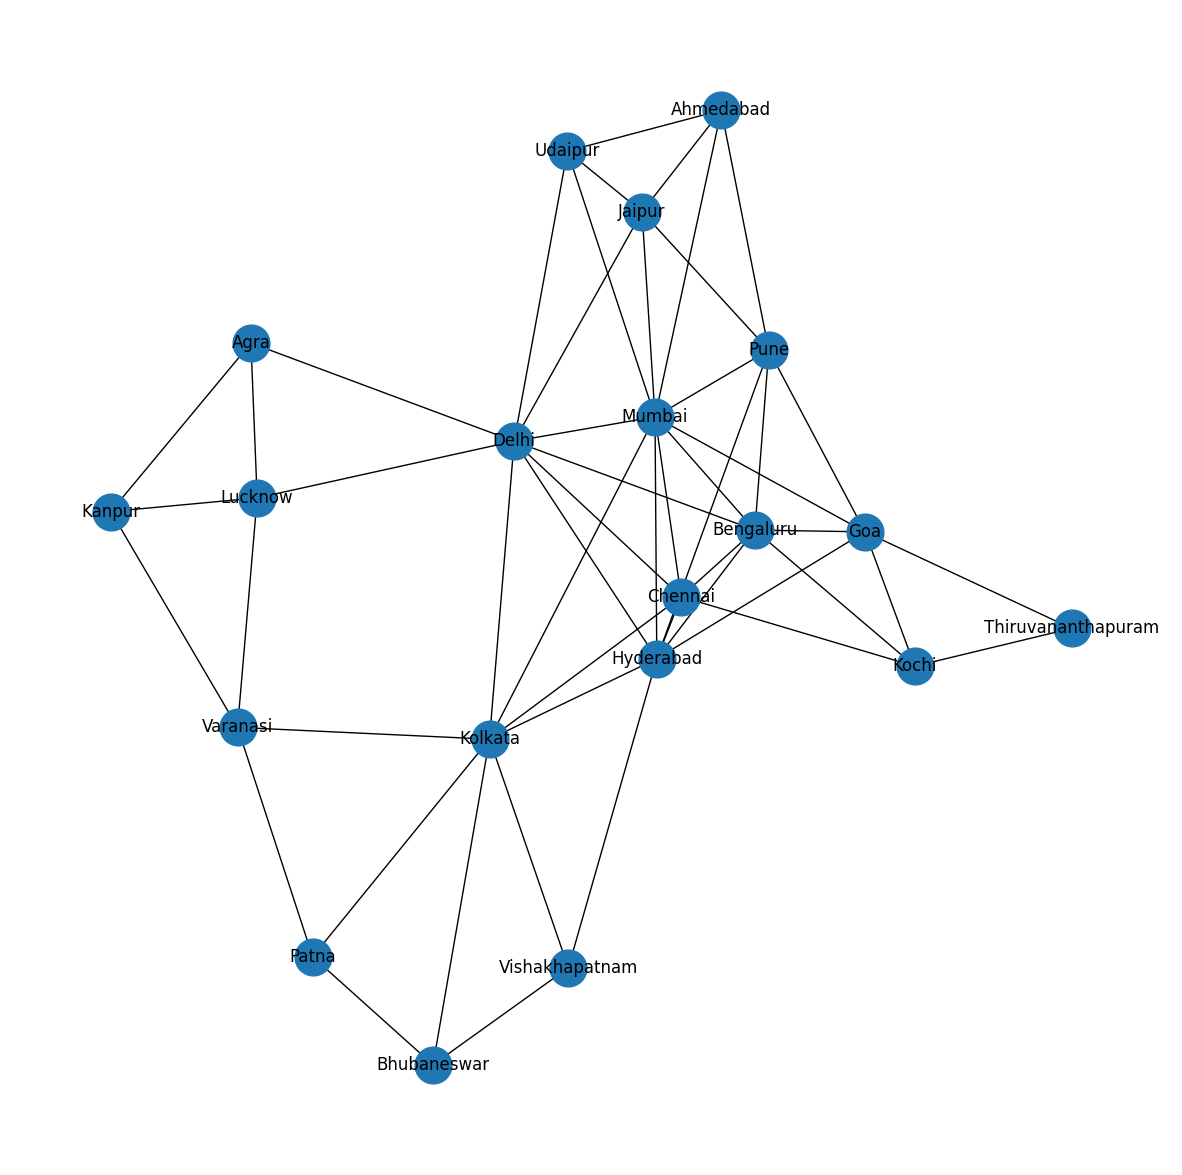

[('Mumbai', 10),
 ('Delhi', 9),
 ('Hyderabad', 8),
 ('Kolkata', 8),
 ('Bengaluru', 7),
 ('Pune', 6),
 ('Chennai', 6),
 ('Goa', 6),
 ('Jaipur', 5),
 ('Lucknow', 4)]

In [ ]:
# Create a graph from the dataframe
# distance is in [] because it will work as an edge attribute. while other 2 are parameters
G = nx.from_pandas_edgelist(df, 'Origin', 'Destination', ['Distance'])

# Draw the graph
#plots a figure of size 15X15 size
plt.figure(figsize=(15, 15))

#Calculates the positions of all nodes in G
pos = nx.spring_layout(G, k=0.15, seed=42)  #K is a parameter that influence the dist between nodes. 'seed' ensure layout is same each time the code runs

#drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

#drawing edges at position 'pos'
nx.draw_networkx_edges(G, pos, width=1)

#drawing labels at position 'pos'
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')


plt.axis('off') #this line disables the axis around the plot
plt.show() #prints the figure

# Identify the cities with the most connections
degree_dict = dict(G.degree(G.nodes())) #the number of edges connected to each node
sorted_degree = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True) #desc order sorting


sorted_degree[:10] # Shows top 10 cities with the most connections

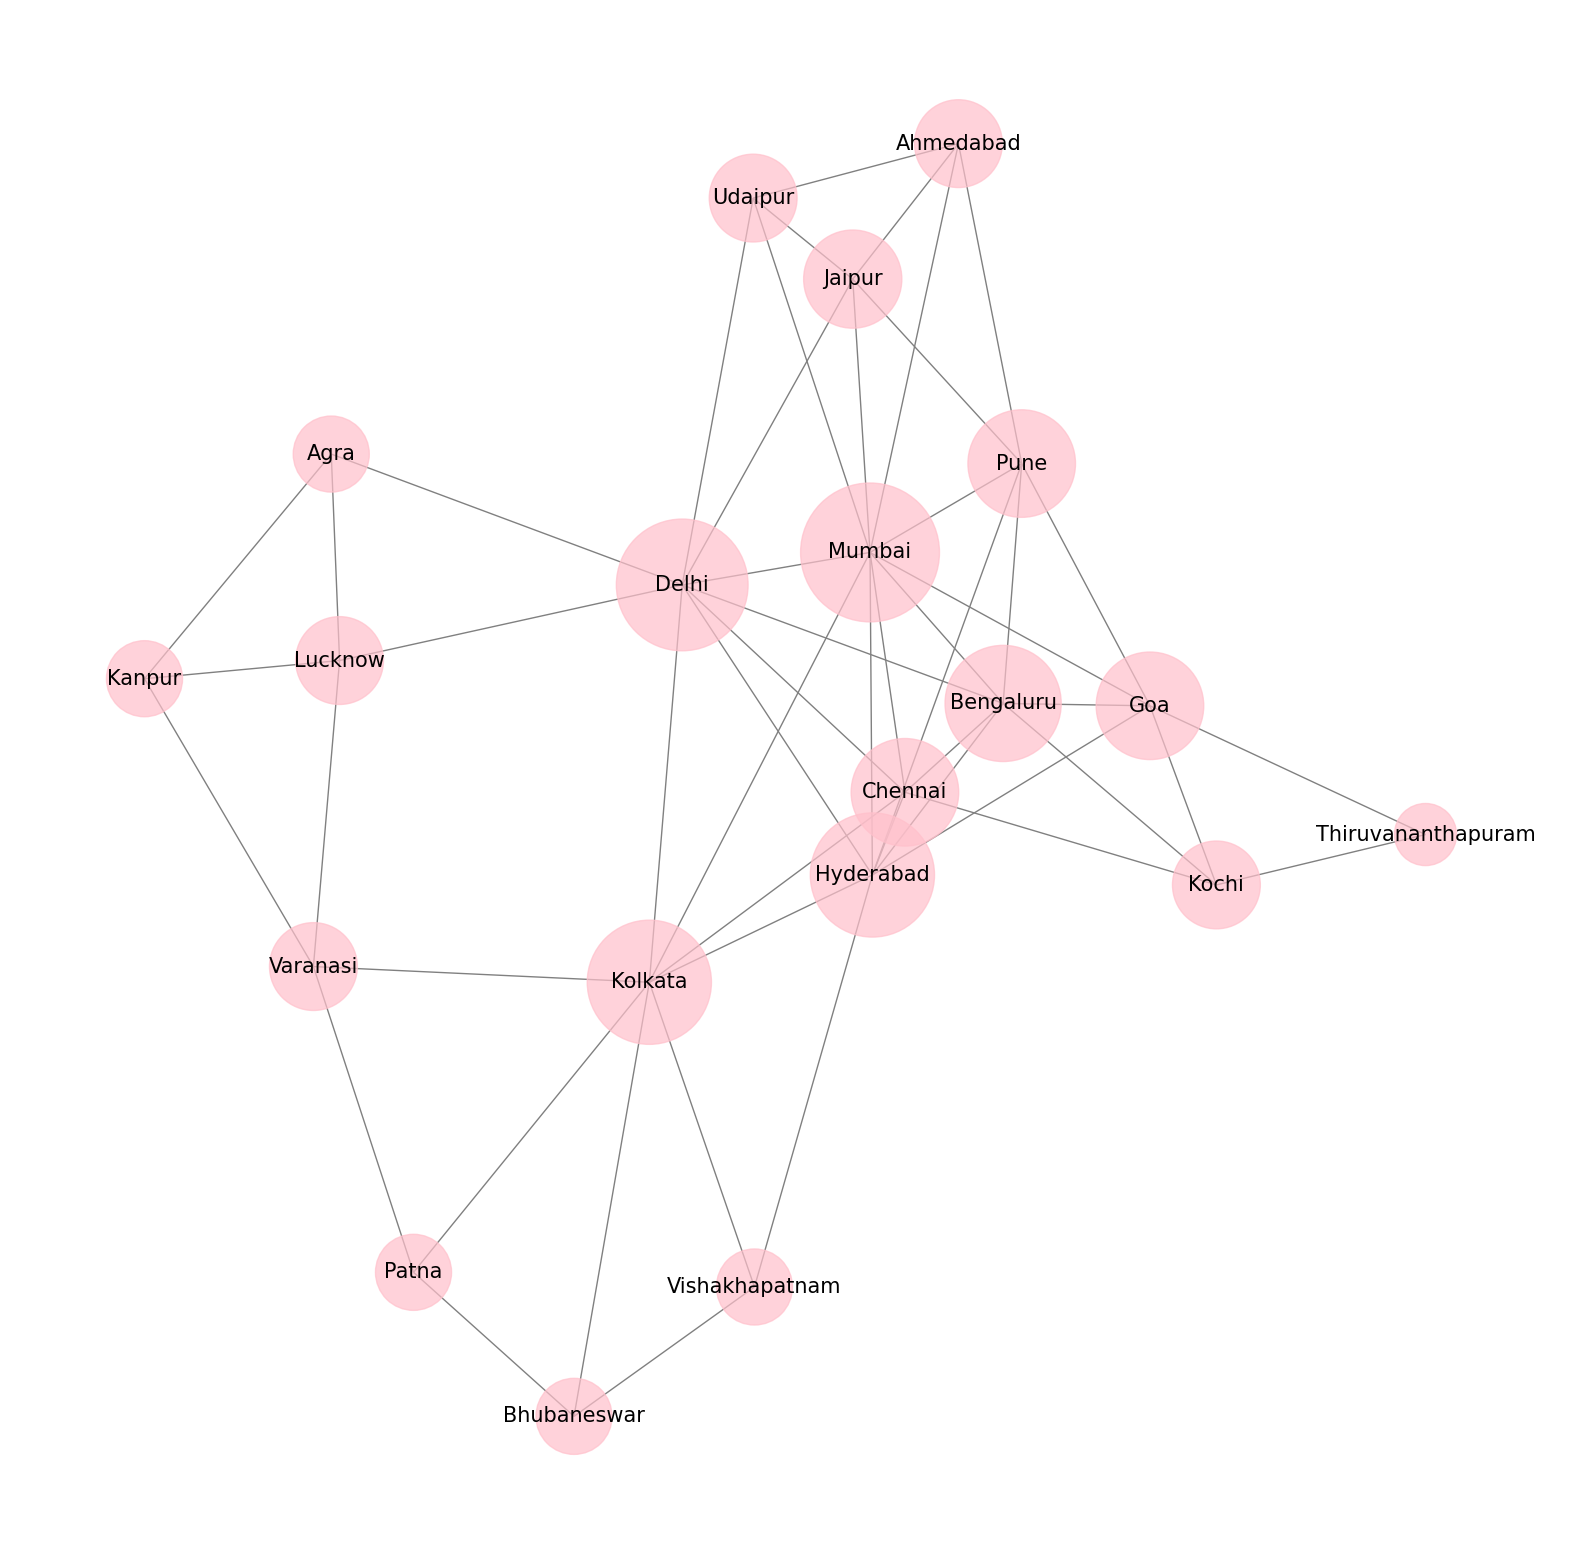

In [ ]:
# Draw the graph with node size corresponding to the number of connections (degree)

# Determine node size by the number of connections, scaled
node_sizes = [v * 1000 for v in degree_dict.values()] # Each degree value is multiplied by 1000 to scale up node size for better figure.

#plotting figure of dimensions 20x20 using matplotlib
plt.figure(figsize=(20, 20))

# Position nodes
pos = nx.spring_layout(G, k=0.15, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='pink', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=15)

# Remove the axis
plt.axis('off')

# Show the graph
plt.show()


 **Betweenness Centrality**

**Definition**: **Betweenness centrality** measures the extent to which a node lies on the shortest paths between other nodes in the network. It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.
Importance in Route Optimization: Cities with high betweenness centrality are crucial for efficiently connecting various parts of the network. These cities often serve as key transit points or hubs in the transportation network, where routes converge from multiple directions. Identifying these cities helps in enhancing the resilience of the network by ensuring that crucial connections are maintained or improved, and bottlenecks are identified and mitigated. For example, a city with high betweenness centrality in India might be a critical junction for national highways or railway networks, influencing the flow of goods and passengers across the country.



**Closeness centrality**

**Definition**: **Closeness centrality** measures how close a node is to all other nodes in the network, based on the shortest paths. It reflects the average length of the shortest path from the node to all other nodes, indicating how easily a node can reach or be reached by others.
Importance in Route Optimization: Cities with high closeness centrality can quickly interact with others, making them ideal locations for distribution centers, warehouses, or emergency services. In the context of route optimization, ensuring that key nodes (cities) have high closeness centrality can significantly reduce travel times and costs across the network. It helps in identifying strategic locations for establishing new infrastructure or services to optimize overall network efficiency.



**Eigenvector Centrality**

**Definition: Eigenvector centrality** considers not only the quantity but also the quality of connections a node has. It assigns relative scores to all nodes in the network based on the principle that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.
Importance in Route Optimization: This measure helps identify cities that, while they may not be centrally located or have the highest number of connections, wield significant influence through strategic connections with other influential cities. For route optimization, focusing on enhancing the connectivity of cities with high eigenvector centrality can leverage their position to improve the efficiency and effectiveness of the entire network. It can be particularly useful for identifying potential hubs or nodes that, if further developed, could enhance the network's connectivity and flow.


In [ ]:
# we will calculate the betweenness centrality, closeness centrality and eigenvector centrality

# Calculate centrality measures
#all these are built in functions of networkx library
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# We will return the top 5 cities for each centrality measure for brevity
top_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Compile the results into a readable format
analysis_results = {
    "Top Betweenness Centrality": top_betweenness,
    "Top Closeness Centrality": top_closeness,
    "Top Eigenvector Centrality": top_eigenvector,
}

analysis_results

{'Top Betweenness Centrality': [('Delhi', 0.2660550950024634),
  ('Kolkata', 0.26134674292569027),
  ('Mumbai', 0.18097219544587967),
  ('Hyderabad', 0.11475108711950815),
  ('Goa', 0.08753079279395068)],
 'Top Closeness Centrality': [('Mumbai', 0.6551724137931034),
  ('Delhi', 0.6333333333333333),
  ('Hyderabad', 0.6129032258064516),
  ('Kolkata', 0.6129032258064516),
  ('Chennai', 0.5757575757575758)],
 'Top Eigenvector Centrality': [('Mumbai', 0.420178448505168),
  ('Hyderabad', 0.35789021759182316),
  ('Delhi', 0.34769966558047577),
  ('Bengaluru', 0.32605052375707616),
  ('Chennai', 0.2923542047300046)]}

enter start city: 
Lucknow
enter end city: 
Thiruvananthapuram


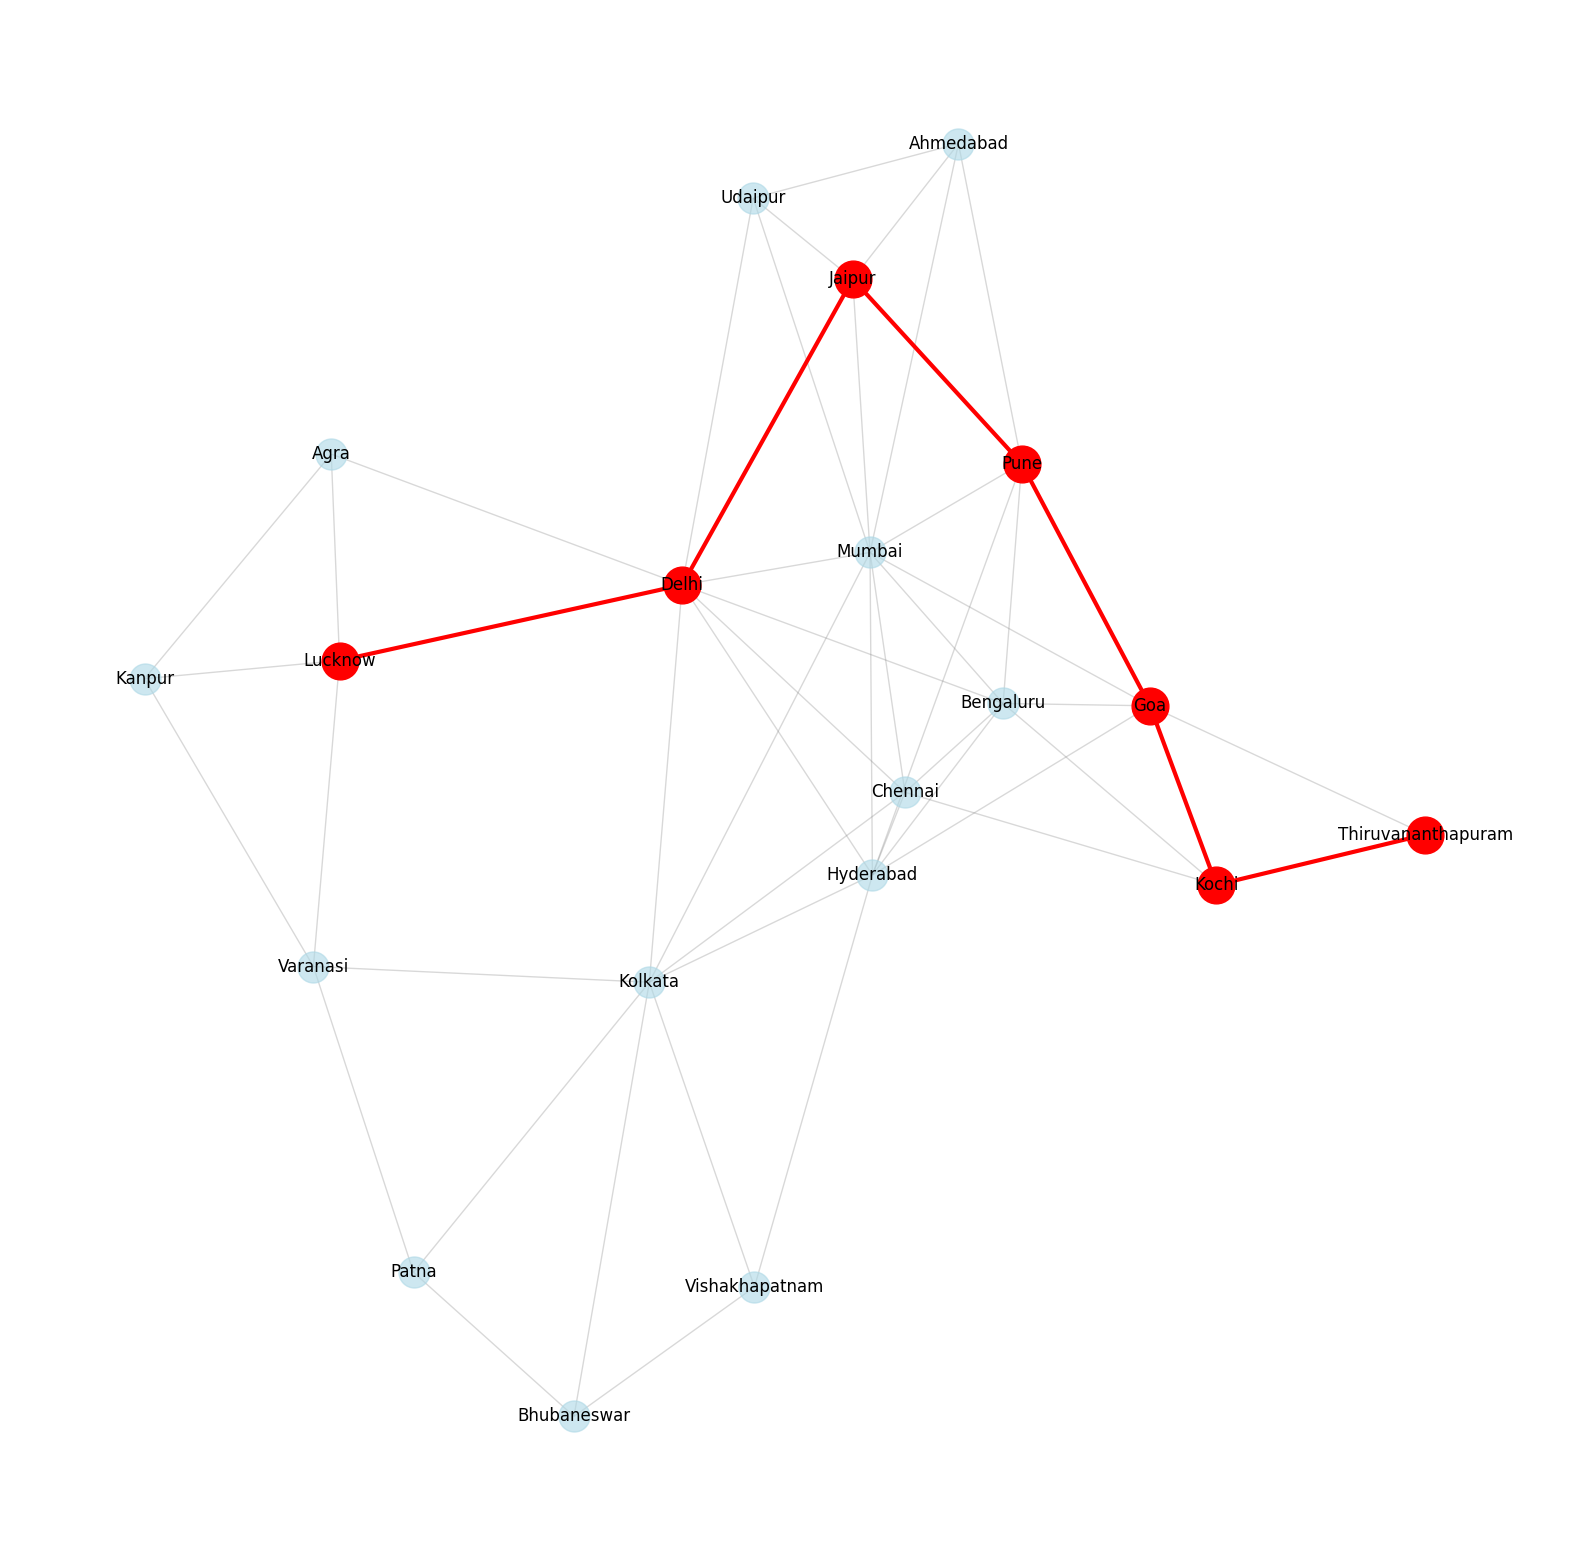

['Lucknow', 'Delhi', 'Jaipur', 'Pune', 'Goa', 'Kochi', 'Thiruvananthapuram']

In [ ]:
# For Path Analysis, we'll focus on finding the shortest path between two major cities.

# For visualization purposes, we will consider the shortest path between Mumbai and Delhi
# which are typically two of the most connected cities in India.

# Calculate the shortest path based on distance

source = input("enter start city: \n")
target = input("enter end city: \n")

try:
    #shortest_path = nx.shortest_path(G, source , target, weight='Distance')
    shortest_path = nx.bellman_ford_path(G, source, target, weight='Distance')

    # Visualization
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G, k=0.15, seed=42)

    # Draw all nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500, alpha=0.6)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Draw the shortest path
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='red', node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.axis('off')
    plt.show()

    # Return the shortest path
    shortest_path
except nx.NetworkXNoPath:
    shortest_path = "No path found"
except nx.NodeNotFound:
    shortest_path = "One of the nodes not found in the graph"

shortest_path

# delhi- mumbai
# delhi- pune
# lucknow - hydderabad
#lucknow - Thiruvananthapuram